In [177]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [178]:
df = pd.read_csv('C:/Users/nikun/Downloads/heart_attack_prediction_dataset.csv/heart_attack_prediction_dataset.csv')

In [179]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [180]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [181]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

- here i will delete some useless features alongside i'll perform feature engineering

In [182]:
df['Sex']=df['Sex'].map({'Female': 0, 'Male': 1})
df['Diet'] = df['Diet'].map({'Average' : 1 , 'Unhealthy' : 0, 'Healthy' : 2})

In [183]:

df = pd.get_dummies(df, columns=['Continent'], drop_first=True, dtype=int)

df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(['Country', 'Patient ID', 'Hemisphere' ,'Blood Pressure'], axis=1, inplace=True)


In [184]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,0,6,0,0,0,0,0,1,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,7,0,0,0,0,1,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,4,4,0,0,0,1,0,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,3,4,0,0,0,0,1,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,1,5,0,1,0,0,0,0,91,88


In [185]:
df.dtypes


Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
Continent_Asia                       int64
Continent_Australia                  int64
Continent_E

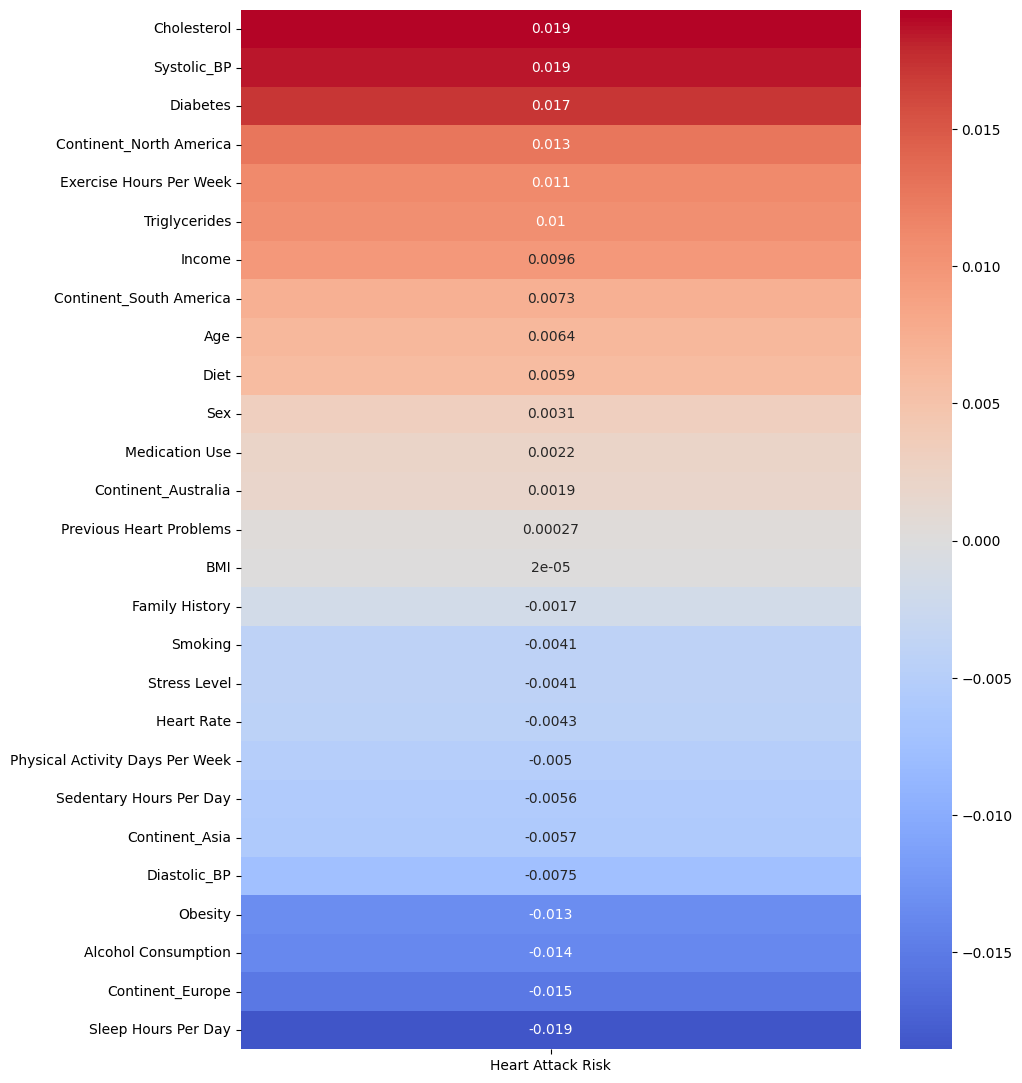

In [186]:
corr = df.corr()
target_corr = corr['Heart Attack Risk'].drop('Heart Attack Risk')


plt.figure(figsize=(10, len(target_corr) * 0.5))
target_corr = target_corr.sort_values(ascending=False)
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [187]:
from sklearn.model_selection import train_test_split 


X = df.drop('Heart Attack Risk', axis=1)   
y = df['Heart Attack Risk']


In [188]:
X_train , X_test , Y_train , Y_test = train_test_split(X, y , test_size=0.2 , random_state=42)


In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

In [190]:
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)



# now testing our model accuracy 

In [191]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred , zero_division=0))

import warnings
warnings.filterwarnings('ignore')

Accuracy: 0.6417569880205363
Confusion Matrix:
 [[1125    0]
 [ 628    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

